In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
plt.rcParams['font.family']=['sans-serif']
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False # 解决保存图像是负号'-'显示为方块的问题
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#%matplotlib inline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
data = torch.rand(3,2,2)
data1 = data[:,0,0]
print(data,data.shape)
print(data1)

tensor([[[0.5915, 0.5694],
         [0.3633, 0.9738]],

        [[0.8751, 0.3182],
         [0.8881, 0.0393]],

        [[0.8385, 0.4849],
         [0.7249, 0.2835]]]) torch.Size([3, 2, 2])
tensor([0.5915, 0.8751, 0.8385])


In [26]:
learning_rate = 1e-2
n_points = 500
n_epochs = 1000
classdata = torch.rand(n_points,2)*2-1
classdata = classdata.to(device)
labels = (classdata.norm(dim=1)>0.7).float().unsqueeze(1).to(device)
print(classdata)
print(labels,labels.shape)

tensor([[ 0.7294,  0.7890],
        [-0.2512, -0.0050],
        [-0.1635,  0.6737],
        [ 0.2324,  0.7984],
        [ 0.3721, -0.5974],
        [ 0.0138,  0.3142],
        [ 0.1484, -0.2131],
        [ 0.9049, -0.9391],
        [ 0.9457,  0.5613],
        [-0.0225, -0.2588],
        [ 0.4309,  0.9326],
        [ 0.5182,  0.1562],
        [ 0.3275, -0.4277],
        [ 0.7815, -0.2540],
        [-0.1169,  0.8655],
        [ 0.7312,  0.5244],
        [-0.7925, -0.4562],
        [-0.9405,  0.1097],
        [ 0.8595, -0.3667],
        [ 0.9799, -0.6451],
        [-0.0918,  0.1223],
        [ 0.1787,  0.0440],
        [-0.3833,  0.7647],
        [ 0.2729,  0.1255],
        [-0.8828, -0.0093],
        [-0.4738, -0.6445],
        [ 0.4857,  0.5535],
        [ 0.5596,  0.3781],
        [-0.4935, -0.3489],
        [-0.8607,  0.9624],
        [ 0.1295, -0.0513],
        [ 0.5518,  0.6059],
        [-0.8741,  0.9774],
        [ 0.7764,  0.8080],
        [-0.3722, -0.2567],
        [-0.6203,  0

In [32]:
# classdata = classdata.cpu()
# plt.scatter(classdata[:,0],classdata[:,1],c=(labels.squeeze()>0.5),cmap="coolwarm")
# plt.title("可视化")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.show()

**一些错误和解决方案**<br>
报错：<br>
12:03:45.293 [error] Disposing session as kernel process died ExitCode: 3, Reason: OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized.
OMP: Hint This means that multiple copies of the OpenMP runtime have been linked into the program. That is dangerous, since it can degrade performance or cause incorrect results. The best thing to do is to ensure that only a single OpenMP runtime is linked into the process, e.g. by avoiding static linking of the OpenMP runtime in any library. As an unsafe, unsupported, undocumented workaround you can set the environment variable KMP_DUPLICATE_LIB_OK=TRUE to allow the program to continue to execute, but that may cause crashes or silently produce incorrect results. For more information, please see http://www.intel.com/software/products/support/.<br>
解决方法：<br>
[关于OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized.错误解决方法](https://zhuanlan.zhihu.com/p/371649016)

In [18]:
# 创建模型类
class CircleClassifier(nn.Module):
    def __init__(self):
        super(CircleClassifier, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x): # 使对象成为可调用对象
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

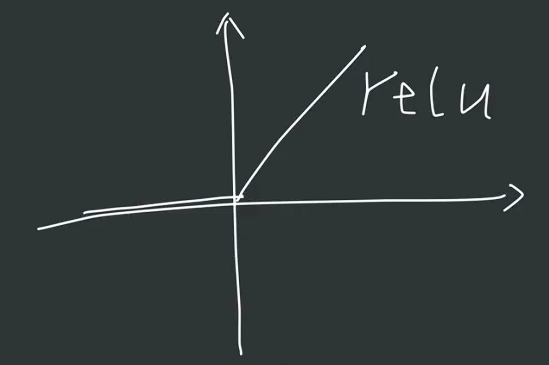
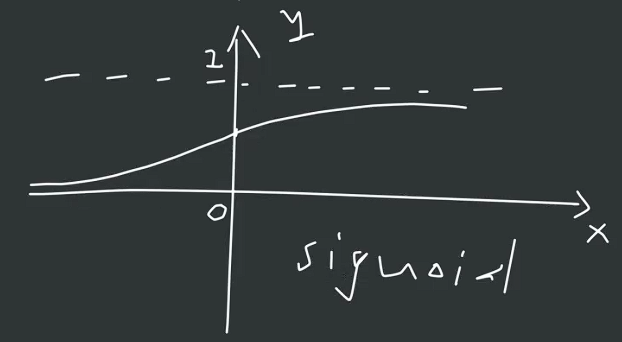

In [28]:
# 实例化
model = CircleClassifier().to(device)
loss_fn = nn.BCELoss() # Binary Cross Entropy
# learning_rate = 1e-2
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

# n_epochs = 100
for epoch in range(n_epochs):
    optimizer.zero_grad() # 梯度清零
    # 前向传播
    y_pred = model(classdata) # 可调用对象，做前馈运算
    loss = loss_fn(y_pred, labels) # 计算损失
    # 反向传播
    loss.backward() # 计算梯度
    optimizer.step() # 更新参数（做一步优化运算）
    if epoch % 10 == 0:
        print(f'epoch: {epoch}, loss = {loss.item():.4f}')
# predictions = model(classdata) # 可调用对象
# print(predictions)

epoch: 0, loss = 0.7261
epoch: 10, loss = 0.6502
epoch: 20, loss = 0.6347
epoch: 30, loss = 0.6049
epoch: 40, loss = 0.5723
epoch: 50, loss = 0.5328
epoch: 60, loss = 0.4864
epoch: 70, loss = 0.4333
epoch: 80, loss = 0.3784
epoch: 90, loss = 0.3287
epoch: 100, loss = 0.2867
epoch: 110, loss = 0.2524
epoch: 120, loss = 0.2248
epoch: 130, loss = 0.2026
epoch: 140, loss = 0.1845
epoch: 150, loss = 0.1696
epoch: 160, loss = 0.1572
epoch: 170, loss = 0.1466
epoch: 180, loss = 0.1375
epoch: 190, loss = 0.1296
epoch: 200, loss = 0.1226
epoch: 210, loss = 0.1165
epoch: 220, loss = 0.1111
epoch: 230, loss = 0.1063
epoch: 240, loss = 0.1020
epoch: 250, loss = 0.0980
epoch: 260, loss = 0.0945
epoch: 270, loss = 0.0912
epoch: 280, loss = 0.0881
epoch: 290, loss = 0.0853
epoch: 300, loss = 0.0827
epoch: 310, loss = 0.0803
epoch: 320, loss = 0.0781
epoch: 330, loss = 0.0760
epoch: 340, loss = 0.0741
epoch: 350, loss = 0.0723
epoch: 360, loss = 0.0705
epoch: 370, loss = 0.0689
epoch: 380, loss = 0.06

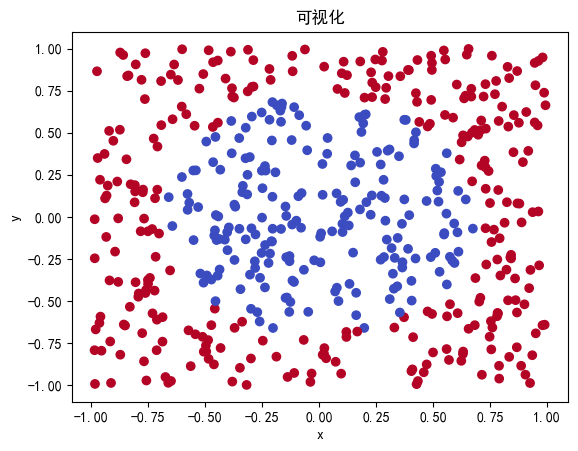

In [29]:
classdata = classdata.cpu()
y_pred = y_pred.cpu()
plt.scatter(classdata[:,0],classdata[:,1],c=(y_pred.squeeze()>0.5),cmap="coolwarm")
plt.title("可视化")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [3]:
torch.tril(torch.ones(3, 3))

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])

In [9]:
torch.manual_seed(1337)
a = torch.tril(torch.ones(3, 3))
a = a / torch.sum(a, dim=1, keepdim=True)
b = torch.randint(0, 10, (3, 2)).float()
# c = torch.cat([a, b], dim=1)
c = a @ b
print('a=')
print(a)
print('b=')
print(b)
print('c=')
print(c)

a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
b=
tensor([[5., 7.],
        [2., 0.],
        [5., 3.]])
c=
tensor([[5.0000, 7.0000],
        [3.5000, 3.5000],
        [4.0000, 3.3333]])


In [30]:
torch.manual_seed(1337)
B,T,C = 4,8,2 # batch, time, channels
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [11]:
xbow = torch.zeros((B,T,C))
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] # (t,C)
        xbow[b,t] = torch.mean(xprev, 0) # (C,)

In [15]:
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(1, keepdim=True)
# wei
xbow2 = wei @ x # (T,T)@(B,T,C) --> (B,T,C)
# xbow2
torch.allclose(xbow, xbow2)

True

In [18]:
# xbow[0],xbow2[0]

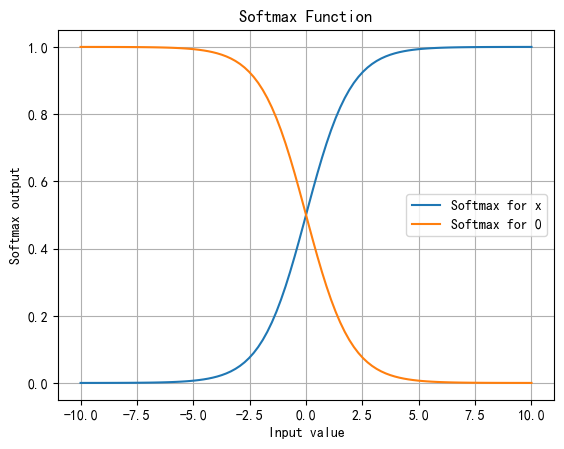

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

# 生成输入数据
x = np.linspace(-10, 10, 100)
# 假设输入向量只有两个元素，另一个固定为 0
z = np.vstack((x, np.zeros_like(x))).T
# 将 numpy 数组转换为 torch 张量
z = torch.tensor(z, dtype=torch.float32)
# print(z)
# 计算 Softmax
y = F.softmax(z, dim=1)  # 直接使用 F.softmax 对张量进行操作
# 将 torch 张量转换回 numpy 数组
y = y.numpy()
# print(y)
# 绘制图像
plt.plot(x, y[:, 0], label='Softmax for x')
plt.plot(x, y[:, 1], label='Softmax for 0')
plt.xlabel('Input value')
plt.ylabel('Softmax output')
plt.title('Softmax Function')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# version 3: use softmax
tril = torch.tril(torch.ones(T,T))
wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
# print(wei)
wei = F.softmax(wei, dim=-1)
# print(wei)
xbow3 = wei @ x
torch.allclose(xbow, xbow3)

True

第一，注意力是一种通信机制。你可以把它看作是一个通信机制，其中有若干节点在一个有向图中。有边指向节点，每个节点都有一些信息向量，这些信息向量可以被节点的邻居访问。节点之间的通信是通过注意力机制来实现的。

我们有8个节点，block_size=8，总是有8个词元Token，第一个节点仅仅指向它自己，第二个节点由第一个节点和它自己指向，一直到第八个节点，它
由之前的节点以及它自己指向。

这就是我们有向图的结构，或者在自回归的语言建模场景中发生的事情。但原则上，注意力可以应用于任何任意的有向图。它只是节点之间的通信机制。

第二，注意到没有空间的概念。因此，注意力只是作用于这个图中的一组向量。因此，默认情况下，这些节点不知道它们在空间中的位置。这就是我们需要对它们进行位置编码的原因，并给他们一些锚定到特定位置的信息，这样他们就知道自己在哪里。这与卷积等有所不同，因为如果你在某个输入上执行卷积操作，信息在空间中的布局非常具体，卷积滤波器在空间中起作用。注意力只是空间中的一组向量。它们互相之间通信，如果希望他们具有空间概念，则需要对它们进行位置编码。

Notes:
- Attention is a **communication mechanism**. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.
- There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
- Each example across batch dimension is of course processed completely independently and never "talk" to each other
- In an "encoder" attention block just delete the single line that does masking with `tril`, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
- "self-attention" just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)
- "Scaled" attention additional divides `wei` by 1/sqrt(head_size). This makes it so when input Q,K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. Illustration below

笔记：
- 注意力是一种**沟通机制**。可以看作是有向图中的节点，它们相互看着，用指向它们的所有节点的加权和聚合信息，并具有数据相关的权重。
- 没有空间的概念。注意力只是作用于一组向量。这就是为什么我们需要对令牌进行位置编码。
- 当然，跨批处理维度的每个示例都是完全独立处理的，从不相互“交谈”
- 在“编码器”注意力块中，只需删除用“tril”进行屏蔽的单行，允许所有令牌进行通信。这里的这个块被称为“解码器”注意力块，因为它具有三角形掩码，通常用于自回归设置，如语言建模。
- “自我关注”只是意味着键和值与查询来自同一来源。在“交叉注意力”中，查询仍然由x生成，但键和值来自其他外部源（例如编码器模块）
- “缩放”注意力附加将“wei”除以1/sqrt（head_size）。这使得当输入Q、K是单位方差时，wei也将是单位方差，Softmax将保持扩散，不会饱和太多。下图

In [44]:
# version 4: self-attention!
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time, channels
x = torch.randn(B,T,C)

# Let's see a single Head perform self-attention
head_size = 16
key = nn.Linear(C,head_size,bias=False)
query = nn.Linear(C,head_size,bias=False)
value = nn.Linear(C,head_size,bias=False)
k = key(x) # (B,T,16)
q = query(x) # (B,T,16)
wei = q @ k.transpose(-2,-1) # (B,T,16) @ (B,16,T) ---> (B,T,T)

tril = torch.tril(torch.ones(T,T))
# wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

v = value(x)
out = wei @ v
# out = wei @ x
out.shape

torch.Size([4, 8, 16])

In [43]:
wei

tensor([[[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
         [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
         [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
         [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],

        [[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.1687, 0.8313, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.2477, 0.0514, 0.7008, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.4410, 0.0957, 0.3747, 0.0887, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0069, 0.0456, 0.0300, 0.7748, 0.1427, 0.0000, 0.0000, 0.0000],
         [0.0660, 0.089

In [50]:
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
wei = q @ k.transpose(-2,-1) * head_size**-0.5

问题在于，如果输入是单位高斯的，零均值单位方差，k和q是单位高斯，如果你只是单纯加权，会发现权重的实际方差将是头部大小的数量级。在我们的案例中是16。

但如果你乘以head_size的平方根的倒数，那么权重的方差就会是1。

为什么这一点很重要？

因为这意味着我们的权重矩阵的元素将被初始化得足够小，以至于在训练过程中不会发生梯度爆炸。这是因为梯度爆炸是由于权重矩阵的元素过大而导致的。

所以，如果你乘以head_size的平方根的倒数，那么你就可以确保你的权重矩阵的元素不会过大，从而避免梯度爆炸。

In [51]:
k.var()

tensor(0.9006)

In [52]:
q.var()

tensor(1.0037)

In [53]:
wei.var()

tensor(0.9957)

In [54]:
torch.softmax(torch.tensor([0.1,-0.2,0.3,-0.2,0.5]),dim=-1)

tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])